In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

terran_data = read_csv('../Output/TerranMarch.csv', header=0, index_col=False)
display(terran_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
0,0,World of Sleepers LE,us,437,T,P,0.0,1,0,Player 1 - INnoVation (Terran),12,12,15,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,1
1,0,World of Sleepers LE,us,437,T,P,117.6,480,30,Player 1 - INnoVation (Terran),13,14,15,50,727,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,1
2,0,World of Sleepers LE,us,437,T,P,197.4,960,60,Player 1 - INnoVation (Terran),15,16,23,65,727,200,1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,0,1
3,0,World of Sleepers LE,us,437,T,P,200.2,1440,90,Player 1 - INnoVation (Terran),17,18,23,135,867,275,1350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,0,0,0,0,0,1,0,0,0,0,0,1
4,0,World of Sleepers LE,us,437,T,P,149.8,1920,120,Player 1 - INnoVation (Terran),18,19,23,405,755,200,1475,0,0,48,179,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69856,1983,Eternal Empire LE,eu,1610,T,Z,159.6,33600,2100,Player 2 - LiquidClem (Terran),62,167,233,445,1483,1350,17225,3975,35744,96,716,700,3200,1700,10884,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,4,1,0,0,13,13,6,3,1,0,3,1,0,1,0,9,62,1,0,2,2,0,15,0,0,0,0,11,0
69857,1983,Eternal Empire LE,eu,1610,T,Z,229.6,34080,2130,Player 2 - LiquidClem (Terran),45,148,233,70,699,650,16825,4575,37594,48,380,300,3575,2075,11209,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,7,1,0,0,13,16,6,3,1,0,3,1,0,1,0,7,45,1,0,2,2,0,15,0,0,0,0,11,0
69858,1983,Eternal Empire LE,eu,1610,T,Z,169.4,34560,2160,Player 2 - LiquidClem (Terran),41,138,233,170,1091,300,16600,4550,38469,64,313,150,3675,2175,11409,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,7,1,0,0,12,14,7,3,2,0,3,1,0,1,0,7,41,1,0,2,2,0,15,0,0,0,0,12,0
69859,1983,Eternal Empire LE,eu,1610,T,Z,159.6,35040,2190,Player 2 - LiquidClem (Terran),37,113,218,605,1651,325,14500,3300,40900,59,335,250,2850,1350,12284,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,1,1,0,0,11,12,7,2,1,0,2,1,0,1,0,7,37,1,0,2,2,0,15,0,0,0,0,10,0


In [2]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(terran_data) if x not in no_standardize]

#Standardizing these columns
stand = terran_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
terran_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_standardized = terran_data_standardized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))
terran_data_standardized = terran_data_standardized.join(terran_data['win'])

#Displaying first and last 5 rows
display(terran_data_standardized.head(5), terran_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,Map_Acropolis LE,Map_Année zéro EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_Вечная империя РВ,Map_Лед и хром РВ,Map_Подводный мир РВ,Map_Помечтай РВ,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-3.003363,-1.415927,-1.237729,-1.174913,-0.514795,-2.048131,-1.612501,-1.191799,-0.970655,-0.523886,-0.667253,-1.364113,-0.974126,-0.885726,-0.820694,-0.440603,-0.713447,-0.066934,-0.203769,-1.064533,-0.720213,-0.811671,-0.169502,-0.400438,-0.228886,-0.236032,-0.956791,-0.817252,-0.519662,-0.703368,-0.384122,-0.205363,-0.278447,-0.440811,-0.264343,-0.427326,-0.739164,-0.608253,-0.44845,-0.841086,-0.075274,-1.156145,-0.465958,-0.291564,-0.19634,-0.321008,-1.384904,-1.415927,-0.397675,-0.568931,-0.995968,-0.815609,-0.248976,-1.302594,-0.212599,-0.183271,-0.35128,0.0,-0.37336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,-0.620782,-1.369031,-1.204103,-1.174913,-0.514795,-1.180274,-1.283774,-1.182962,-0.970655,-0.523886,-0.667253,-1.364113,-0.974126,-0.885726,-0.820694,-0.440603,-0.713447,-0.066934,-0.203769,-1.064533,-0.720213,-0.811671,-0.169502,-0.400438,-0.228886,-0.236032,-0.956791,-0.817252,-0.519662,-0.703368,-0.384122,-0.205363,-0.278447,-0.440811,-0.264343,-0.427326,-0.739164,-0.608253,-0.44845,-0.841086,-0.075274,-1.156145,-0.465958,-0.291564,-0.19634,-0.321008,-1.384904,-1.369031,-0.397675,-0.568931,-0.995968,-0.815609,-0.248976,-1.142724,-0.212599,-0.183271,-0.35128,0.0,-0.37336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,0.995970,-1.275239,-1.170476,-1.070870,-0.485305,-1.180274,-1.174198,-1.147613,-0.970655,-0.523886,-0.667253,-1.364113,-0.974126,-0.885726,-0.820694,-0.440603,-0.713447,-0.066934,-0.203769,-0.686786,-0.720213,-0.811671,-0.169502,-0.400438,-0.228886,-0.236032,-0.956791,-0.817252,-0.519662,-0.703368,-0.384122,-0.205363,-0.278447,-0.440811,-0.264343,-0.427326,-0.739164,-0.608253,-0.44845,-0.841086,-0.075274,-1.156145,-0.465958,-0.291564,-0.19634,-0.321008,-1.384904,-1.275239,-0.397675,-0.568931,-0.995968,-0.815609,-0.248976,-1.142724,-0.212599,-0.183271,-0.35128,0.0,-0.

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,Map_Acropolis LE,Map_Année zéro EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_Вечная империя РВ,Map_Лед и хром РВ,Map_Подводный мир РВ,Map_Помечтай РВ,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
69856,0.230140,0.928880,1.368305,1.66025,0.261779,-0.277797,1.346044,1.675877,1.136455,5.354281,-0.445683,0.557232,2.193853,1.347909,0.971507,4.754090,0.765547,-0.066934,-0.203769,3.090686,3.510648,2.389999,-0.169502,-0.400438,-0.228886,-0.236032,1.312899,0.32948,-0.519662,0.959875,2.457682,2.677556,2.201801,-0.440811,-0.264343,2.244399,0.117497,1.603761,0.595450,-0.115136,-0.075274,1.189123,0.684544,-0.291564,2.383885,-0.321008,1.855653,0.928880,1.115504,-0.568931,1.076819,1.794049,-0.248976,1.095459,-0.212599,-0.183271,-0.35128,0.0,4.996787,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
69857,1.648343,0.131646,1.048856,1.66025,-0.475475,-1.213699,-0.188016,1.605180,1.454510,5.658517,-0.556468,-0.344405,0.383580,1.609663,1.366846,4.909205,0.765547,-0.066934,-0.203769,3.090686,3.510648,2.389999,-0.169502,-0.400438,-0.228886,-0.236032,1.312899,0.32948,-0.519662,0.959875,2.457682,4.839744,2.201801,-0.440811,-0.264343,2.244399,0.315188,1.603761,0.595450,-0.115136,-0.075274,1.189123,0.684544,-0.291564,2.383885,-0.321008,1.135529,0.131646,1.115504,-0.568931,1.076819,1.794049,-0.248976,1.095459,-0.212599,-0.183271,-0.35128,0.0,4.996787,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
69858,0.428689,-0.055939,0.880724,1.66025,-0.278874,-0.745748,-0.955046,1.565412,1.441257,5.802412,-0.519539,-0.524196,-0.295273,1.679464,1.472269,5.004661,0.765547,-0.066934,-0.203769,3.090686,3.510648,2.389999,-0.169502,-0.400438,-0.228886,-0.236032,1.312899,0.32948,-0.519662,0.959875,2.457682,4.839744,2.201801,-0.440811,-0.264343,2.038882,0.183394,1.972430,0.595450,0.610814,-0.075274,1.189123,0.684544,-0.291564,2.383885,-0.321008,1.135529,-0.055939,1.115504,-0.568931,1.076819,1.794049,-0.248976,1.095459,-0.212599,-0.183271,-0.35128,0.0,5.484983,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_standardized) if x not in no_X]

Y = terran_data_standardized['win']
X_standardized = terran_data_standardized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(terran_data_standardized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [5]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [6]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [7]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(44711, 1)
(11177, 1)
(13973, 1)


In [9]:
print(X_standardized_train.shape)
print(X_standardized_val.shape)
print(X_standardized_test.shape)

(44711, 131)
(11177, 131)
(13973, 131)


In [10]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_standardized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_standardized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_standardized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [11]:
val_performance = {}
performance = {}

In [12]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=123, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.7033 - binary_accuracy: 0.5346 - precision: 0.5241 - recall: 0.5126 - val_loss: 0.6897 - val_binary_accuracy: 0.5457 - val_precision: 0.5787 - val_recall: 0.5825
Epoch 2/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6839 - binary_accuracy: 0.5697 - precision: 0.5606 - recall: 0.5499 - val_loss: 0.6857 - val_binary_accuracy: 0.5500 - val_precision: 0.5813 - val_recall: 0.5951
Epoch 3/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6744 - binary_accuracy: 0.5822 - precision: 0.5738 - recall: 0.5622 - val_loss: 0.6838 - val_binary_accuracy: 0.5526 - val_precision: 0.5834 - val_recall: 0.5987: 0.676
Epoch 4/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6681 - binary_accuracy: 0.5907 - precision: 0.5826 - recall: 0.5711 - val_loss: 0.6827 - val_binary_accuracy: 0.5532 - val_precision: 0.5841 - val_recall: 0.5985 - prec - ETA: 6s - loss: 

1398/1398 [==============================] - 12s 9ms/step - loss: 0.6158 - binary_accuracy: 0.6398 - precision: 0.6316 - recall: 0.6301 - val_loss: 0.6733 - val_binary_accuracy: 0.5806 - val_precision: 0.6076 - val_recall: 0.629716 - precision: 0.6333 - re - ETA: 5s - loss: 0.6053 - binary_accuracy: 0.6610 - precisio - ETA: 0s - loss: 0.6158 - binary_accuracy: 0.6398 - precision: 0.6315 - recall: 0.62
Epoch 24/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6126 - binary_accuracy: 0.6430 - precision: 0.6347 - recall: 0.6336 - val_loss: 0.6732 - val_binary_accuracy: 0.5812 - val_precision: 0.6079 - val_recall: 0.6317inary_accuracy: 0.6
Epoch 25/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6092 - binary_accuracy: 0.6469 - precision: 0.6388 - recall: 0.6376 - val_loss: 0.6732 - val_binary_accuracy: 0.5819 - val_precision: 0.6087 - val_recall: 0.6312ary_accuracy: 0.647 - ETA: 1s - loss: 0
Epoch 26/100
1398/1398 [===========================

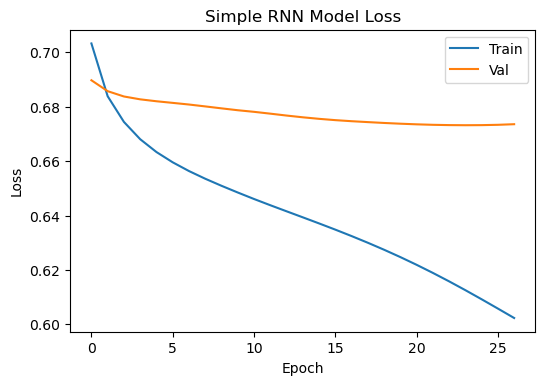

In [13]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [14]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6972 - binary_accuracy: 0.5200 - precision_1: 0.5110 - recall_1: 0.3984 - auc: 0.5246 - val_loss: 0.6908 - val_binary_accuracy: 0.5292 - val_precision_1: 0.6561 - val_recall_1: 0.2685 - val_auc: 0.57920.6978 - 
Epoch 2/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6855 - binary_accuracy: 0.5471 - precision_1: 0.5441 - recall_1: 0.4485 - auc: 0.5681 - val_loss: 0.6839 - val_binary_accuracy: 0.5517 - val_precision_1: 0.6504 - val_recall_1: 0.3667 - val_auc: 0.5942- a - ETA: 1s - loss: 0.6865 - binary_accur
Epoch 3/100
1398/1398 [==============================] - 12s 8ms/step - loss: 0.6769 - binary_accuracy: 0.5680 - precision_1: 0.5674 - recall_1: 0.4863 - auc: 0.5990 - val_loss: 0.6770 - val_binary_accuracy: 0.5629 - val_precision_1: 0.6350 - val_recall_1: 0.4475 - val_auc: 0.6030A: 0s - loss: 0.6782 - bina

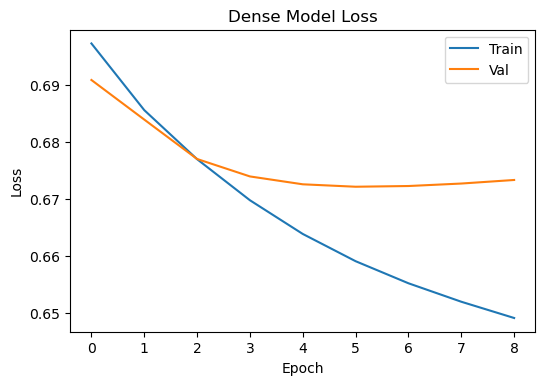

In [15]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [19]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1398/1398 [==============================] - 13s 9ms/step - loss: 0.6954 - binary_accuracy: 0.5240 - precision_5: 0.5131 - recall_5: 0.4963 - auc_4: 0.5329 - val_loss: 0.6858 - val_binary_accuracy: 0.5434 - val_precision_5: 0.6059 - val_recall_5: 0.4409 - val_auc_4: 0.5699
Epoch 2/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6772 - binary_accuracy: 0.5679 - precision_5: 0.5645 - recall_5: 0.5050 - auc_4: 0.5966 - val_loss: 0.6828 - val_binary_accuracy: 0.5526 - val_precision_5: 0.6161 - val_recall_5: 0.4542 - val_auc_4: 0.5824
Epoch 3/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6640 - binary_accuracy: 0.5879 - precision_5: 0.5868 - recall_5: 0.5280 - auc_4: 0.6295 - val_loss: 0.6805 - val_binary_accuracy: 0.5612 - val_precision_5: 0.6122 - val_recall_5: 0.5105 - val_auc_4: 0.5909
Epoch 4/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6511 - binary_accuracy: 0.6091 - precision_5: 0.6065 - recall_

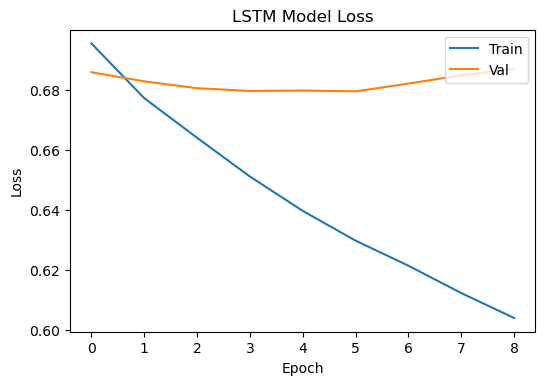

In [20]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [25]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.3))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1398/1398 [==============================] - 13s 9ms/step - loss: 0.6992 - binary_accuracy: 0.5396 - precision_9: 0.5291 - recall_9: 0.5215 - auc_8: 0.5554 - val_loss: 0.6874 - val_binary_accuracy: 0.5479 - val_precision_9: 0.5954 - val_recall_9: 0.5069 - val_auc_8: 0.5732
Epoch 2/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6732 - binary_accuracy: 0.5770 - precision_9: 0.5697 - recall_9: 0.5468 - auc_8: 0.6093 - val_loss: 0.6839 - val_binary_accuracy: 0.5567 - val_precision_9: 0.6034 - val_recall_9: 0.5218 - val_auc_8: 0.5867
Epoch 3/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6623 - binary_accuracy: 0.5962 - precision_9: 0.5900 - recall_9: 0.5673 - auc_8: 0.6355 - val_loss: 0.6815 - val_binary_accuracy: 0.5615 - val_precision_9: 0.6025 - val_recall_9: 0.5515 - val_auc_8: 0.595279  - ETA: 5s - loss: 0.6580 - binary_accuracy: 0.6086 - precision_9: 0 - ETA: 1s - loss: 0.6654 - binary_a
Epoch 4/100
1398/1398 [============

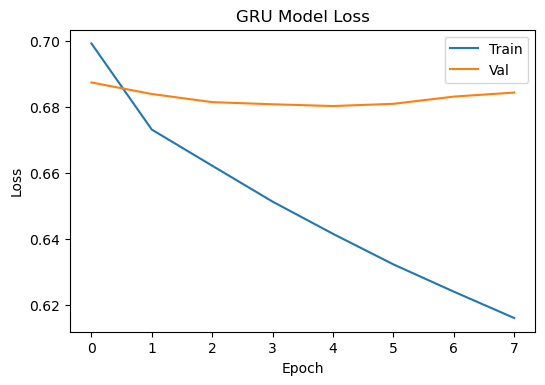

In [27]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

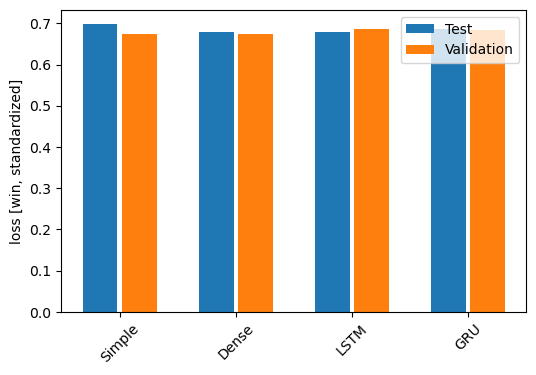

In [31]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, standardized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

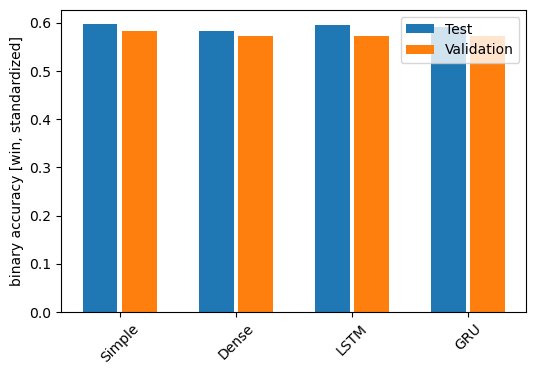

In [32]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'binary_accuracy'
metric_index = lstm_model.metrics_names.index('binary_accuracy')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('binary accuracy [win, standardized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()